In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
# from textwrap import wrap

import functions as f

%matplotlib inline

In [2]:
df_1 = pd.read_csv("../data/raw/df_final_web_data_pt_1.txt")
df_2 = pd.read_csv("../data/raw/df_final_web_data_pt_2.txt")
df_1, df_2

(        client_id             visitor_id                      visit_id  \
 0         9988021   580560515_7732621733  781255054_21935453173_531117   
 1         9988021   580560515_7732621733  781255054_21935453173_531117   
 2         9988021   580560515_7732621733  781255054_21935453173_531117   
 3         9988021   580560515_7732621733  781255054_21935453173_531117   
 4         9988021   580560515_7732621733  781255054_21935453173_531117   
 ...           ...                    ...                           ...   
 343136    2443347  465784886_73090545671  136329900_10529659391_316129   
 343137    2443347  465784886_73090545671  136329900_10529659391_316129   
 343138    2443347  465784886_73090545671  136329900_10529659391_316129   
 343139    2443347  465784886_73090545671  136329900_10529659391_316129   
 343140    2443347  465784886_73090545671  136329900_10529659391_316129   
 
        process_step            date_time  
 0            step_3  2017-04-17 15:27:07  
 1        

In [3]:
# Concatenate the two dataframes
df = pd.concat([df_1, df_2], axis=0)
df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [4]:
# Check random client_ids

list_of_ids = df["client_id"].to_list()
df[df["client_id"] == random.choice(list_of_ids)]

,client_id,visitor_id,visit_id,process_step,date_time
225876,8047851,481612077_30895324842,322696270_40483879469_519136,confirm,2017-04-05 00:24:29
225891,8047851,481612077_30895324842,778650898_18730582371_369776,confirm,2017-03-28 21:32:08
225892,8047851,481612077_30895324842,778650898_18730582371_369776,confirm,2017-03-28 21:30:28
225893,8047851,481612077_30895324842,778650898_18730582371_369776,step_3,2017-03-28 21:30:06
225894,8047851,481612077_30895324842,778650898_18730582371_369776,step_2,2017-03-28 21:28:26
225895,8047851,481612077_30895324842,778650898_18730582371_369776,step_1,2017-03-28 21:28:04
225896,8047851,481612077_30895324842,778650898_18730582371_369776,start,2017-03-28 21:27:04
225897,8047851,481612077_30895324842,56245688_24834201825_235774,start,2017-03-17 13:33:37


In [5]:
# Check for NaN values count
df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [6]:
# Visualizes only rows with NaN values
df_nas = df[df.isna().any(axis=1)]
df_nas

,client_id,visitor_id,visit_id,process_step,date_time


In [7]:
# Casting process_steps as numbers
steps_map = {
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
}

df["process_step"] = df["process_step"].map(steps_map)
df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


In [8]:
# Rename dataframe to export
df_web_data = df
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


In [9]:
# Save to csv
#f.save_to_csv(df_web_data, "df_web_data_clean.csv")

DataFrame successfully saved to ../data/clean/df_web_data_clean.csv


In [10]:
# create a dummy function to export dataframe directly
def import_df_web_data():
    return (
        df_web_data
        )

# Time Spent on Each Step Analysis

In [11]:
df_web_data = df_web_data.sort_values(by=["client_id","date_time"], ascending=[True,True])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
285515,169,201385055_71273495308,749567106_99161211863_557568,0,2017-04-12 20:19:36
285514,169,201385055_71273495308,749567106_99161211863_557568,1,2017-04-12 20:19:45
285513,169,201385055_71273495308,749567106_99161211863_557568,2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,4,2017-04-12 20:23:09
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,1,2017-06-01 22:40:08
305391,9999875,738878760_1556639849,931268933_219402947_599432,1,2017-06-01 22:41:28
305390,9999875,738878760_1556639849,931268933_219402947_599432,2,2017-06-01 22:41:47
305389,9999875,738878760_1556639849,931268933_219402947_599432,3,2017-06-01 22:44:58


In [15]:
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

#df_web_data["prev_step"] = df_web_data.groupby("visit_id")["process_step"].shift(1)


#is_repeated = df_web_data["process_step"] == df_web_data["prev_step"]

#df_web_data = df_web_data[~((df_web_data["process_step"] == 0) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")
#df_web_data = df_web_data[~((df_web_data["process_step"] == 4) & is_repeated)]
df_web_data = df_web_data.drop_duplicates(subset=["visit_id", "process_step"], keep="last")


#df_web_data = df_web_data.drop(columns=["prev_step"])


df_web_data["time_diff"] = df_web_data.groupby("visit_id")["date_time"].diff()
df_web_data["time_spent"] = df_web_data["time_diff"].shift(-1)


df_web_data_filtered = df_web_data.dropna(subset=["time_spent"])
df_web_data_filtered = df_web_data_filtered[df_web_data_filtered["process_step"] != 4]


average_time_per_step = df_web_data_filtered.groupby("process_step")["time_spent"].mean()
median_time_per_step = df_web_data_filtered.groupby("process_step")["time_spent"].median()


df_results = pd.DataFrame({
    "average_time": average_time_per_step,
    "median_time": median_time_per_step})

df_web_data


,client_id,visitor_id,visit_id,process_step,date_time,prev_step,time_diff,time_spent
285515,169,201385055_71273495308,749567106_99161211863_557568,0,2017-04-12 20:19:36,NaN,NaT,0 days 00:00:09
285514,169,201385055_71273495308,749567106_99161211863_557568,1,2017-04-12 20:19:45,0.0,0 days 00:00:09,0 days 00:00:46
285513,169,201385055_71273495308,749567106_99161211863_557568,2,2017-04-12 20:20:31,1.0,0 days 00:00:46,0 days 00:01:34
285512,169,201385055_71273495308,749567106_99161211863_557568,3,2017-04-12 20:22:05,2.0,0 days 00:01:34,0 days 00:01:04
285511,169,201385055_71273495308,749567106_99161211863_557568,4,2017-04-12 20:23:09,3.0,0 days 00:01:04,NaT
...,...,...,...,...,...,...,...,...
305393,9999875,738878760_1556639849,931268933_219402947_599432,0,2017-06-01 22:40:01,NaN,NaT,0 days 00:01:27
305391,9999875,738878760_1556639849,931268933_219402947_599432,1,2017-06-01 22:41:28,1.0,0 days 00:01:27,0 days 00:00:19
305390,9999875,738878760_1556639849,931268933_219402947_599432,2,2017-06-01 22:41:47,1.0,0 days 00:00:19,0 days 00:03:11
305389,9999875,738878760_1556639849,931268933_219402947_599432,3,2017-06-01 22:44:58,2.0,0 days 00:03:11,0 days 00:03:41


In [16]:
df_results

,average_time,median_time
process_step,,
0,0 days 00:00:49.987215660,0 days 00:00:12
1,0 days 00:00:54.517010665,0 days 00:00:24
2,0 days 00:01:46.876072198,0 days 00:01:07
3,0 days 00:02:32.411291905,0 days 00:01:05


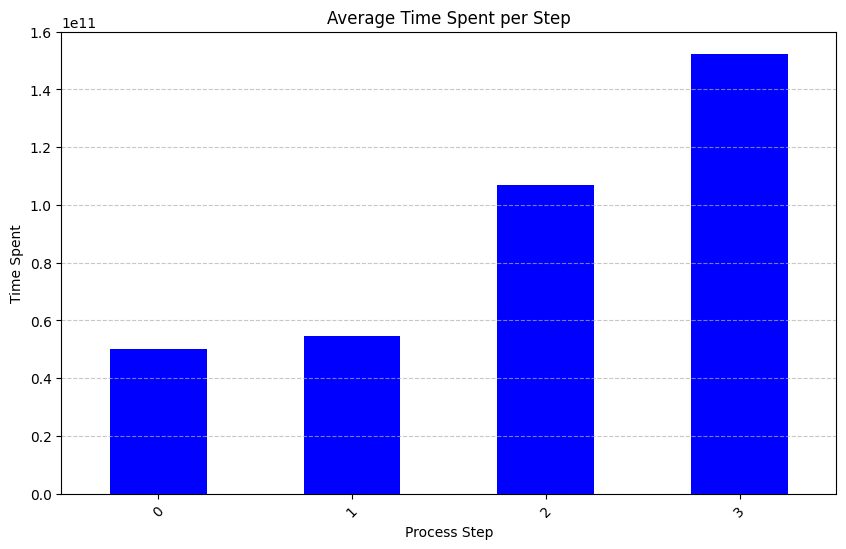

'\ndf_results["median_time"].plot(kind="bar", figsize=(10, 6), rot=45, color=\'green\')\nplt.title("Median Time Spent per Step")\nplt.xlabel("Process Step")\nplt.ylabel("Time Spent")\nplt.grid(axis="y", linestyle="--", alpha=0.7)\nplt.show()\n'

In [17]:
df_results["average_time"].plot(kind="bar", figsize=(10, 6), rot=45, color='blue')
plt.title("Average Time Spent per Step")
plt.xlabel("Process Step")
plt.ylabel("Time Spent")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

'''
df_results["median_time"].plot(kind="bar", figsize=(10, 6), rot=45, color='green')
plt.title("Median Time Spent per Step")
plt.xlabel("Process Step")
plt.ylabel("Time Spent")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
'''

In [ ]:
mean_completion_rate (test) > (mean_completion_rate(control)*0,05)+ mean_completion_rate